1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [7]:
import numpy as np
from numpy import random
from scipy.stats import poisson
from math import sqrt, pi, erf
import matplotlib.pyplot as plt
#number of hurricane 
x0 = 15
mu = 6.3
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print(mean)
print(var)

# determine the Z score
#Z = abs(x0 - mu) / sigma_mu
#print("Z =", Z)

6.3
6.3


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [6]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre) 
sample1_mean = np.mean(pre)
sample2_mean = np.mean(post)
sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma_1**2 + sigma_2**2)/2)
# calculate the test statistics
T = (sample1_mean - sample2_mean) / (sigma / np.sqrt(2/n))
print("T =", T)

#Here our degree of freedom, 
ddl = 10 -1 = 9
# For alpha = 0.05 (5% of risk), we found in the table of student the critical value: t = 2.263
# Here, abs(T) < 2.101, so the difference is not significant 

T = -0.7573995876275257


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

parameters:
 [ 36.65063004 -10.38013928  36.66744784]
covariance matrix:
 [[ 1.43808857 -0.03826514 -1.47186775]
 [-0.03826514  2.08505048  0.13739947]
 [-1.47186775  0.13739947  3.63583967]]
A = 36.65 +- 1.20
f = -10.38 +- 1.44
parameters:
 [-15.91765052   1.           1.        ]
covariance matrix:
 [[-5.13103233e+20 -4.98803277e+18 -7.17620308e+19]
 [ 2.19067172e+20  3.25747070e+18  2.88661451e+19]
 [-4.23848784e+20 -5.89270197e+18 -5.64939017e+19]]
A = -15.92 +- nan
f = 1.00 +- 1804846447.31


/var/folders/dv/ctwb40g55qxf959xsh2gxtv80000gn/T/ipykernel_61762/2258725191.py:41: RuntimeWarning: invalid value encountered in sqrt
  print("A = %.2f +- %.2f" % (popt2[0], np.sqrt(pcov2[0,0])))


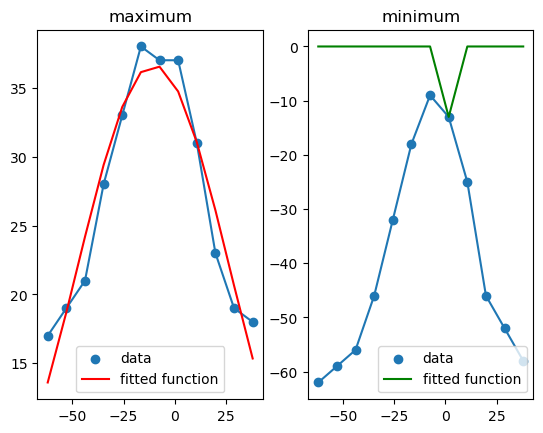

In [73]:
maxi=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mini=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
minimum = min(mini)
maximum = max(maxi)
x = np.linspace(minimum, maximum, 12)
plt.subplot(1, 2, 1)
plt.plot(x, maxi)
#ax1.legend(['maximum'])
plt.title('maximum')
plt.subplot(1, 2, 2)
plt.plot(x,mini)
plt.title('minimum')

# The Gaussian function can describe well the maximum and minimum temperatures 

from scipy import optimize

#Gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# fit by means of curve_fit
# p0 is a list of the initial guessed values for the parameters
x0, sigma = 0, 1

popt1, pcov1 = optimize.curve_fit(gauss_function, x, maxi, p0 = [1, x0, sigma], full_output=False)
print("parameters:\n", popt1)
print("covariance matrix:\n", pcov1)
print("A = %.2f +- %.2f" % (popt1[0], np.sqrt(pcov1[0,0])))
print("f = %.2f +- %.2f" % (popt1[1], np.sqrt(pcov1[1,1])))
plt.subplot(1, 2, 1)
plt.scatter(x, maxi, label='data')
plt.plot(x, gauss_function(x, popt1[0], popt1[1], popt1[2]), color='red', label='fitted function')
plt.legend(loc='best')

x1, sigma1 = 0,1
p0 = [1, x1, sigma1]
popt2, pcov2 = optimize.curve_fit(gauss_function, x, mini , full_output=False)
print("parameters:\n", popt2)
print("covariance matrix:\n", pcov2)
print("A = %.2f +- %.2f" % (popt2[0], np.sqrt(pcov2[0,0])))
print("f = %.2f +- %.2f" % (popt2[1], np.sqrt(pcov2[1,1])))
plt.subplot(1, 2, 2)
plt.scatter(x, mini, label='data')
plt.plot(x, gauss_function(x, popt2[0], popt2[1], popt2[2]), color='green', label='fitted function')
plt.legend(loc='best')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.